In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Simulation Parameters
time = np.linspace(0, 3600, 3600)  # 1-hour simulation, 1-second intervals
initial_soc = 100  # Initial State of Charge in percentage
battery_capacity = 3.2  # Battery capacity in Ah
current_profile = np.random.normal(loc=1.0, scale=0.2, size=len(time))  # Simulated current draw (A)
temperature_profile = 25 + 5 * np.sin(2 * np.pi * time / 3600)

In [ ]:
# Initialize result arrays
soc = np.zeros(len(time))
voltage = np.zeros(len(time))
temperature = np.zeros(len(time))
health = np.ones(len(time)) * 100  # Battery health in percentage

In [ ]:
# Battery Characteristics
nominal_voltage = 3.7  # in volts
internal_resistance = 0.05  # ohms
degradation_rate = 0.001  # health degradation rate per step

In [ ]:
# Initial values
soc[0] = initial_soc
temperature[0] = temperature_profile[0]
voltage[0] = nominal_voltage

In [ ]:
# BMS Simulation Loop
for t in range(1, len(time)):
    dt = (time[t] - time[t - 1]) / 3600  # Convert time step to hours
    delta_soc = (current_profile[t] * dt) / battery_capacity * 100
    soc[t] = max(soc[t - 1] - delta_soc, 0)

    voltage[t] = nominal_voltage - (current_profile[t] * internal_resistance)
    temperature[t] = temperature_profile[t]

    # Battery health degradation logic
    if soc[t] < 20 or temperature[t] > 45:
        health[t] = health[t - 1] - degradation_rate * 10
    else:
        health[t] = health[t - 1] - degradation_rate

    health[t] = max(health[t], 50)  # Minimum health limit

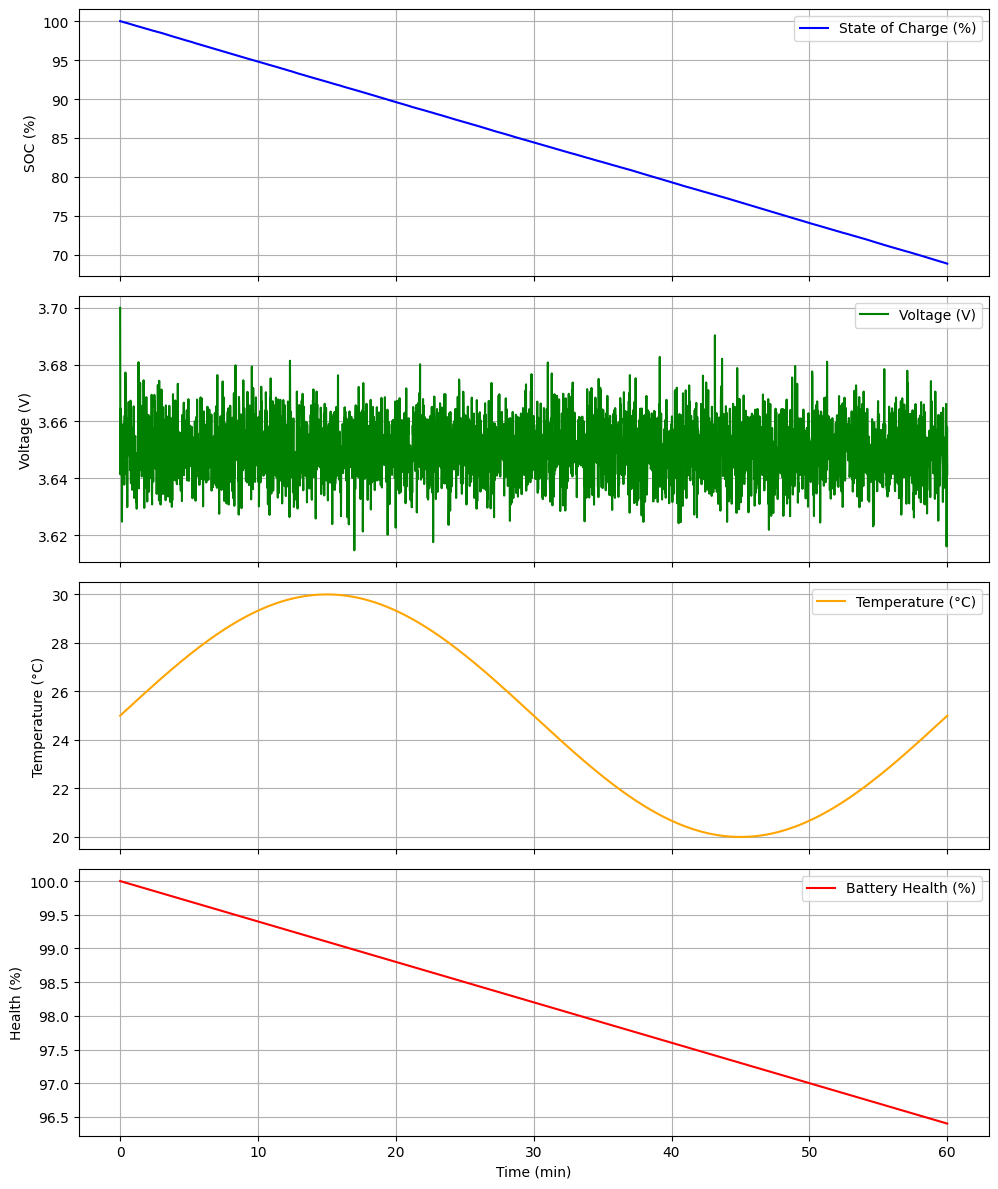

In [ ]:
# Plotting Results
fig, axs = plt.subplots(4, 1, figsize=(10, 12), sharex=True)

axs[0].plot(time / 60, soc, label='State of Charge (%)', color='blue')
axs[0].set_ylabel('SOC (%)')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(time / 60, voltage, label='Voltage (V)', color='green')
axs[1].set_ylabel('Voltage (V)')
axs[1].legend()
axs[1].grid(True)

axs[2].plot(time / 60, temperature, label='Temperature (°C)', color='orange')
axs[2].set_ylabel('Temperature (°C)')
axs[2].legend()
axs[2].grid(True)

axs[3].plot(time / 60, health, label='Battery Health (%)', color='red')
axs[3].set_ylabel('Health (%)')
axs[3].set_xlabel('Time (min)')
axs[3].legend()
axs[3].grid(True)

plt.tight_layout()
plt.show()